# Conversão numérica e ponto flutuante

## Sistema binário

Neste capítulo, exploramos exercícios simples de conversão numérica como parte do conhecimento introdutó à computação numérica com Python.

In [1]:
# (100)_2 -> base 10
c = int('100',base=2)
print(c)

# representação  
print(1*2**2 + 0*2**1 + 0*2**0)

# (4)_10 -> base 2
# obs: note que '0b' indica que o número é binário
c = bin(4)
print(c)

4
4
0b100


In [3]:
# (222)_8
c = int('222',base=8)
print(c)

# representação  
print(2*8**2 + 2*8**1 + 2*8**0)

# (146)_10 -> base 8

c = oct(146)
# obs: note que '0o' indica que o número é octal
print(c)

146
146
0o222


In [4]:
# (2AE4)_16
c = int('2ae4',base=16)
print(c)

# representação  
# obs: A = 10; E = 14
print(2*16**3 + 10*16**2 + 14*16**1 + 4*166**0)

# (146)_10 -> base 8

c = oct(146)
# obs: note que '0o' indica que o número é octal
print(c)

10980
10980
0o222


## Sistema de ponto flutuante 

### A reta "perfurada" 

Na realidade, a matemática computacional opera sobre um universo discreto e "descontínuo (conjunto $\mathbb{F}$), de pontos flutuantes, ao invés de trabalhar com números reais (conjunto $\mathbb{R}$). Por exemplo, o sistema de ponto flutuante $\mathbb{F}(2,3,-1,2)$ seria bastante limitado em sua capacidade de representar números. Determinemos todos eles.

Como a base é 2 e a precisão é 3, os dígitos possíveis são $0$ e $1$ com mantissas: 

- $0.100$
- $0.101$
- $0.110$
- $0.111$

Para cada expoente no conjunto $e=\{-1,0,1,2\}$, obteremos 16 números positivos, a saber: 

- $(0.100 \times 2^{-1})_{2} = (0.01)_2 = 0.2^0 + 0.2^{-1} + 1.2^{-2} = 1/4$
- $(0.100 \times 2^{0})_{2} = (0.1)_2 = 0.2^0 + 1.2^{-1} = 1/2$
- $(0.100 \times 2^{1})_{2} = (1.0)_2 = 1.2^0 + 0.2^{-1} = 1$
- $(0.100 \times 2^{2})_{2} = (10.0)_2 = 1.2^1 + 0.2^{1} + 0.2^{-1} = 2$


- $(0.101 \times 2^{-1})_{2} = (0.0101)_2 = 0.2^0 + 0.2^{-1} + 1.2^{-2} + 0.2^{-3} + 1.2^{-4}= 5/16$
- $(0.101 \times 2^{0})_{2} = (0.101)_2 = 0.2^0 + 1.2^{-1} + 0.2^{-2} + 1.2^{-3} = 5/8$
- $(0.101 \times 2^{1})_{2} = (1.01)_2 = 1.2^0 + 0.2^{-1} + 1.2^{-2} = 1$
- $(0.101 \times 2^{2})_{2} = (10.1)_2 = 1.2^1 + 0.2^{1} + 0.2^{-1} = 2$

$\vdots$



Fazendo as contas para os números restantes, obtemos a seguinte tabela: 

|     | m  | 0.100 | 0.101 | 0.110 | 0.111 |
|-----|----|------ |-------|-------|-------|
|**e**|    |       |       |       |       |
| -1  |    | 1/4   | 5/16  | 3/8   | 7/16  |
| 0   |    | 1/2   | 5/8   | 3/4   | 7/8   |
| 1   |    | 1     | 5/4   | 3/2   | 7/4   |
| 2   |    | 2     | 5/2   | 3     | 7/2   |

Na reta real, esses valores ficariam dispostos da seguinte forma: 

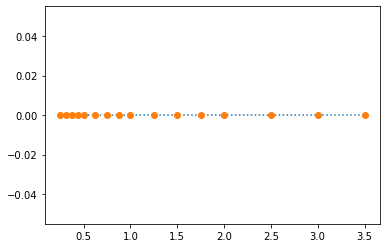

In [21]:
from matplotlib.pyplot import plot
x = [1/4,1/2,1,2,5/16,5/8,5/4,5/2,3/8,3/4,3/2,3,7/16,7/8,7/4,7/2]
x = sorted(x)

plot(x,16*[0],':')
plot(x,16*[0],'o');

Isto é, $\mathbb{F}$ é uma reta "perfurada", para a qual apenas 16 números positivos, 16 simétricos destes e mais o 0 são representáveis. Logo, o conjunto contém apenas 33 elementos.

## Simulador de $\mathbb{F}$

O programa abaixo permite-nos simular sistemas de pontos flutuantes básicos que plotam apenas a parte positiva do eixo.

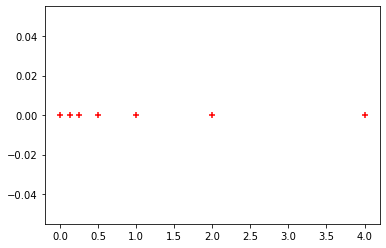

In [23]:
def simulacao_F(b,t,L,U):
    x = []
    epsm = b**(1-t) # epsilon de máquina
    M = np.arange(1.,b-epsm,epsm)

    E = 1
    for e in range(0,U+1):
        x = np.concatenate([x,M*E])
        E *= b    
    E = b**(-1)
    
    y = []
    for e in range(-1,L-1,-1):
        y = np.concatenate([y,M*E])
        E /= b    
    yy = np.asarray(y)
    xx = np.asarray(x)    
    x = np.concatenate([yy,np.array([0.]),xx])
    return x

Y = simulacao_F(2,2,-3,2)
X = np.zeros(Y.shape)

plt.scatter(Y,X,c='r',marker='+');

## Limites de máquina para ponto flutuante

As informações sobre os limites de máquina para um sistema de 64 bits utilizados na computação científica com Python podem ser obtidas com a ajuda do _numpy_. Detalhes são exibidos com

```python
help(np.finfo)
```



In [27]:
import numpy as np 

# epsilon de máquina para tipo float (64 bits)
print('Epsilon de máquina do numpy - 64 bits')
print(np.finfo(float).eps)

# número máximo representável 
print('\nNúmero máximo representável:')
print(np.finfo(float).max)

# número mínimo representável 
print('\nNúmero mínimo representável:') 
print(np.finfo(float).min)

# número de bits no expoente 
print('\nNúmero de bits no expoente') 
print(np.finfo(float).nexp)

# número de bits na mantissa
print('\nNúmero de bits na mantissa')
print(np.finfo(float).nmant)

Epsilon de máquina do numpy - 64 bits
2.220446049250313e-16

Número máximo representável:
1.7976931348623157e+308

Número mínimo representável:
-1.7976931348623157e+308

Número de bits no expoente
11

Número de bits na mantissa
52


O cálculo do _epsilon de máquina_ pode ser realizado da seguinte forma:

In [36]:
def eps_mach(func=float):
    eps = func(1)
    while func(1) + func(eps) != func(1):
        epsf = eps
        eps = func(eps) / func(2)
    return epsf

eps_mach()

2.220446049250313e-16

Em termos relativos, a estagnação do _epsilon de máquina_ pode ser graficamente representada através dos seguintes comandos.

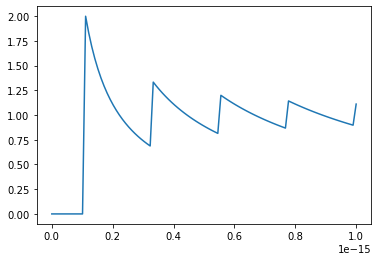

In [39]:
from matplotlib.pyplot import plot

x = np.linspace(1e-15,1e-20,num=100)
f = ((1+x)-1)/x
plot(x,f);

## Exercícios

1. Use o simulador de $\mathbb{F}$ para construir outros sistemas computacionais.